In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_NE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.0,NaN,27.0,31.0,0.0
1,85.0,64.0,59.0,32.0,23.0,NaN
2,86.0,NaN,33.0,NaN,54.0,0.0
3,91.0,78.0,NaN,24.0,36.0,NaN
4,NaN,55.0,13.0,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91.0,NaN,25.0,22.0,35.0,4.0
341,89.0,48.0,32.0,22.0,14.0,4.0
342,85.0,NaN,22.0,23.0,34.0,4.0
343,95.0,93.0,21.0,27.0,NaN,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	22
float64		column 2	68
float64		column 3	66
float64		column 4	68
float64		column 5	112
float64		column 6	66


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,323.000000,277.000000,279.000000,277.000000,233.000000,279.000000
mean,90.139319,70.097473,30.612903,25.216606,37.098712,3.329749
std,4.364855,17.637079,18.479056,10.065187,37.833274,3.038224
min,65.000000,23.000000,4.000000,8.000000,5.000000,0.000000
25%,87.000000,58.000000,20.000000,20.000000,16.000000,0.500000
50%,90.000000,68.000000,27.000000,23.000000,26.000000,3.000000
75%,92.000000,79.000000,34.000000,27.000000,43.000000,5.000000
max,103.000000,138.000000,154.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

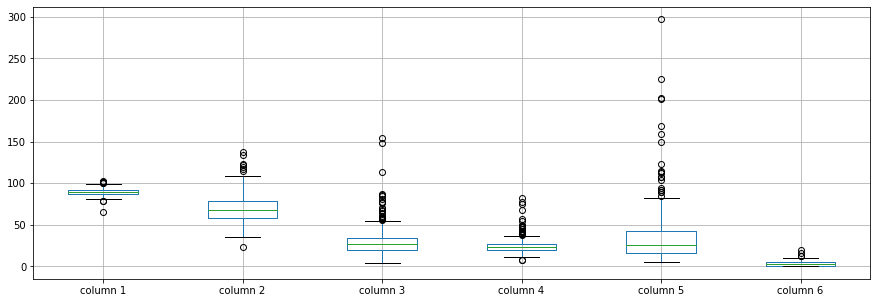

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    90.139319
column 2    70.097473
column 3    30.612903
column 4    25.216606
column 5    37.098712
column 6     3.329749
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.020135,0.192822,0.206532,0.220678,0.256066
column 2,0.020135,1.000000,0.014205,0.056836,0.097241,0.066465
column 3,0.192822,0.014205,1.000000,0.712781,0.436070,0.227678
column 4,0.206532,0.056836,0.712781,1.000000,0.455971,0.225350
column 5,0.220678,0.097241,0.436070,0.455971,1.000000,0.306071
column 6,0.256066,0.066465,0.227678,0.225350,0.306071,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [6,6+12,6+12+12,6+12+12+12,6+12+12+12+12,6+12+12+12,6+12+12,6+12,6], vae_layer = False, seed = 120)
imputer.build_model(df)
imputer.train_model(training_epochs=12)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 229.37655349004837
Epoch: 1 , loss: 229.22090802873885
Epoch: 2 , loss: 227.60986328125
Epoch: 3 , loss: 228.60103861490884
Epoch: 4 , loss: 227.83407229468935
Epoch: 5 , loss: 229.1170894077846
Epoch: 6 , loss: 226.15320332845053
Epoch: 7 , loss: 230.06480335053942
Epoch: 8 , loss: 229.0914510091146
Epoch: 9 , loss: 229.29819524855841
Epoch: 10 , loss: 228.49537658691406
Epoch: 11 , loss: 228.68193562825522
Training complete. Saving file...
Model saved in file: tmp/MIDAS


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.000000
column 2    47.000000
column 3    28.000000
column 4    15.000000
column 5    18.000000
column 6     0.026029
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.000000,0.000000,-44.961824,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.021446
2,0.000000,-53.957215,0.000000,-15.968758,0.000000,0.000000
3,0.000000,0.000000,-33.974070,0.000000,0.000000,0.020828
4,-97.965819,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
340,0.000000,-53.965671,0.000000,0.000000,0.000000,0.000000
341,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
342,0.000000,-51.976536,0.000000,0.000000,0.000000,0.000000
343,0.000000,0.000000,0.000000,0.000000,-46.982379,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

1025.6631993607662

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [19]:
NRMS=numerator/denominator
NRMS


0.4070476346317697

In [20]:
new_df.iloc[66,:]

column 1    86.0
column 2    54.0
column 3    20.0
column 4    21.0
column 5    16.0
column 6     2.0
Name: 66, dtype: float64

In [21]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85.000000,92.000000,0.038176,27.000000,31.000000,0.000000
1,85.000000,64.000000,59.000000,32.000000,23.000000,0.021446
2,86.000000,0.042785,33.000000,0.031242,54.000000,0.000000
3,91.000000,78.000000,0.025930,24.000000,36.000000,0.020828
4,0.034181,55.000000,13.000000,17.000000,17.000000,0.000000
...,...,...,...,...,...,...
340,91.000000,0.034329,25.000000,22.000000,35.000000,4.000000
341,89.000000,48.000000,32.000000,22.000000,14.000000,4.000000
342,85.000000,0.023464,22.000000,23.000000,34.000000,4.000000
343,95.000000,93.000000,21.000000,27.000000,0.017621,6.000000


In [22]:
imputations[-1].to_excel("Bupa_NE_20(imp).xlsx", index=False, header=False)